In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Example1:
$ y \prime{x}  = 3y + 2$  
y(0) = 0

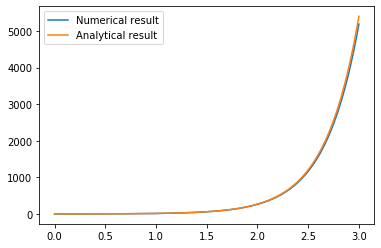

In [20]:
dydx = lambda y: 3*y + 2
y = lambda x:2*np.exp(3*x) / 3 -2/3
y0 = 0
lb = 0
ub = 3
N = 1000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + dydx(y_array[i-1]) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend()


# Example2
$ y \prime  = 1 - x + 4y$  
$ y(0) = 0 $ 

$ y = \frac{x} {4}  - \frac{3}{16} + \frac{19}{16} \exp{4x}$ 

C:\Users\Ruich\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


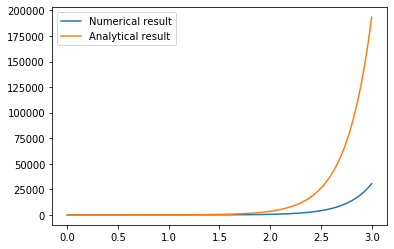

In [25]:
# forward Euler
dydx = lambda x,y: 1 - x + 4 * y
y = lambda x:x/4 + 19/16 *np.exp(4*x) - 3/16
y0 = 1
lb = 0
ub = 3
N = 100000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + dydx(x_array[i-1],y_array[i-1]) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend()

# Comparison between forward Euler and Crank-Nicolson scheme

u() is the target function, h is the step, f is the first order differential equation

- Forward Euler
  - $ u_{n+1} = u_{n} + h f(u_{n},t_{n})$

- Crank-Nicolson
  - $ u_{n+1} = u_{n} + \frac{1}{2} h (f(u_{n},t_{n}) + f(u_{n + 1},t_{n + 1}))$, where $u_{n + 1} = u_{n} + h f(u_{n},t_{n})$

C:\Users\Ruich\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


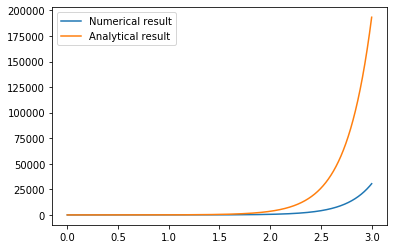

In [34]:
# mid point (1D Crank-Nicolson scheme)
dydx = lambda x,y: 1 - x + 4 * y
y = lambda x:x/4 + 19/16 *np.exp(4*x) - 3/16
y0 = 1
lb = 0
ub = 3
N = 100000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + 0.5 * ( dydx(x_array[i-1],y_array[i-1]) + dydx(x_array[i],y_array[i-1] + delta * dydx(x_array[i-1],y_array[i-1]))) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend()

# Use Euler forward and Crank-Nicolson to solve circular ODE
- Implementation of multi-dimensional solution matrix
  1. create a n * p matrix, where n is the number of steps and p is the number of variables. e.g: $y = x^2$, the number of variable is 2, inlucde x itself  
   
  2. Regarding the independent variable, it could be variables other than x, ODE circle will be an example. If the independent variable is x itself, the first order derivatives is just 1  
   
- Implementation FE and CR
  1. In FE: $U[i] = U[i-1]  + \delta f(U[i-1])$  
   
  2. In CR: $U[i] = U[i-1]  + \frac{1}{2}\delta(f(U[i-1])+f(U[i]))$, where $f(U[i]) = f(x_{i},y_{i},\dots)$ and $f(x_{i},y_{i},\dots) = f(x_{i-1} + \delta x_{Increament},y_{i-1} + \delta y_{Increament},\dots)$  
   
  3. follow 2), In code implementation, we could assign $ (x_{i},y_{i},\dots) = (x_{i-1},y_{i-1,\dots}) + \delta f(x_{i-1},y_{i-1,\dots}) $

In [48]:
def ode_solver(f,boundaryConditon,ub,lb,N,method = 'FE'):
    '''
    f is the multi-dimisional Jacobian, say dy/dx = g(x,y), if the independent variable is x,
    then f = (1,g(x,y))
    boundaryConditon is the starting point of the numerical solution
    ub/lb is the upper/lower bound of the underlying
    N is number of steps
    method only supprt 'FE' standing for forward Euler, 'CR' standing for Crank-Nicolson
    '''
    p = len(boundaryConditon) # p is number of variables
    U = np.zeros((N,p))         # U is the solution matrix
    independentVariable = np.linspace(lb,ub,N + 1)
    delta = (ub - lb) / N     # delta is the step
    U[0] = boundaryConditon   # initialize the solution 
    for i in range(1,N + 1):
        if method == "FE":
            U[i] = U[i-1] + delta * f(U[i-1])
        elif method == "FE":
            variableIncrement = delta * f(U[i-1])
            U_temp = U[i-1] + variableIncrement
            U[i] = U[i-1] + 1/2 * delta * (f(U[i-1]) + f(U_temp))
        else:
            raise("{} method is not supported in ODE solver".format(method))
    return independentVariable,U

In [50]:
f = lambda x:np.array([1,2*x])
boundaryConditon = np.array([0,1])
lb,ub = 0,5
N = 1000
t1,u1 = ode_solver(f,boundaryConditon,ub,lb,N,method = 'FE')
X1 = u1[:,0]
Y1 = u1[:,1]
fig = plt.figure()
l1  = plt.plot(X1, Y1, 'b-')
plt.show()

ValueError: setting an array element with a sequence.

In [47]:
np.zeros((5,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# In the implementation of cicular, we choose 
T = 2 * np.pi    # The radius we choose is 2 and the periphery of a circle is 44pi.
N_t = timesteps
print('N_t:', N_t)
X_0 = 2
Y_0 = 0
U_0 = [X_0, Y_0] # Define the start point. 

print('Forward Euler Scheme')    
t1,u1 = ode_FE3(f=f, A=0, B=T, U_0=U_0, N=N_t)

X1 = u1[:,0]
Y1 = u1[:,1]
fig = plt.figure()
l1  = plt.plot(X1, Y1, 'b-')
plt.show()

N_t: 100
Forward Euler Scheme


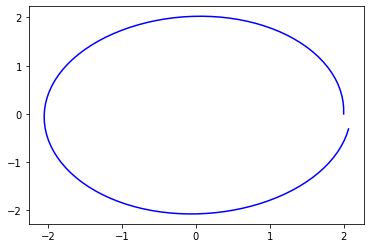

Crank-Nicolson Scheme


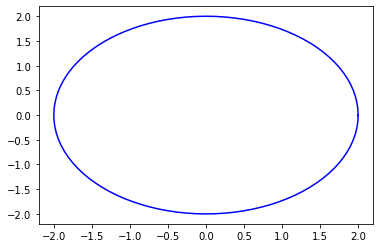

In [36]:
def ode_FE3(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    X_len = len(U_0)
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N+1, X_len))
    t = np.linspace(A, B, N+1)
    dt = (B-A)/N
    u[0] = U_0
    try:
        for n in range(N):
            u[n+1] = u[n]
            # for x in range(X_len-1,-1,-1):
            for x in range(X_len):
                u[n+1][x] = (u[n] + dt*f_(u[n+1], t[n]))[x]
    except:
        print(f'u[n]:{u[n]} f_(u[n], t[n]):{f_(u[n], t[n])}')
        raise
    return t,u


def ode_CR3(f, A, B, U_0, N):
    """
    f: dy/dx = f(x, y)
    A, B: boundary
    U_0: initial value at A
    N: int for num of intervals
    """
    X_len = len(U_0)    
    f_ = lambda u, t: np.array(f(u, t))
    u = np.zeros((N+1, X_len))
    t = np.linspace(A, B, N+1)
    dt = (B-A)/N
    dt_2 = dt/2
    u[0] = U_0
    for n in range(N):
        u[n+1] = u[n]
        # for x in range(X_len-1,-1,-1):
        for x in range(X_len):
            u[n+1][x] = (u[n] + dt_2*(f_(u[n], t[n])+f(u[n]+dt*f_(u[n], t[n]),t[n+1])))[x]
    return t,u

# Demostration of the first circle 
def f(u, t):
    x, y = u
    return [-y/np.sqrt(x**2 + y**2), x/np.sqrt(x**2 + y**2)]
    
T = 4 * np.pi    # The radius we choose is 2 and the periphery of a circle is 44pi.
timesteps = 100  # The number of time steps per circle is 100. 
N_t = timesteps
print('N_t:', N_t)
X_0 = 2
Y_0 = 0
U_0 = [X_0, Y_0] # Define the start point. 

print('Forward Euler Scheme')    
t1,u1 = ode_FE3(f=f, A=0, B=T, U_0=U_0, N=N_t)

X1 = u1[:,0]
Y1 = u1[:,1]
fig = plt.figure()
l1  = plt.plot(X1, Y1, 'b-')
plt.show()

print('Crank-Nicolson Scheme')
t2,u2 = ode_CR3(f=f, A=0, B=T, U_0=U_0, N=N_t)

X2 = u2[:,0]
Y2 = u2[:,1]
fig = plt.figure()
l1  = plt.plot(X2, Y2, 'b-')
plt.show()

In [39]:
temp = np.zeros((5, 2))
temp[2] = [1,1]

In [40]:
temp

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.]])

In [42]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])